In [1]:
%load_ext autoreload
%autoreload 2

import anndata as ad
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
from mmd_wrapper.utilities import alignment_visualize, pairwise_error
import numpy as np
import pandas as pd

from commando import ComManDo

2021-10-19 13:20:19.842187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-19 13:20:19.842222: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


# Read Data

In [2]:
data_mod1 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_phase1/openproblems_bmmc_multiome_phase1.censor_dataset.output_mod1.h5ad')
data_mod2 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_phase1/openproblems_bmmc_multiome_phase1.censor_dataset.output_mod2.h5ad')

In [3]:
# Euclidean w/ defaults
# CPU (4x longer assuming linear)
# cells  features   algo_time (s)  Optimization
# 500    ALL        34
# 500    ALL        25             gradient_reduction(100, .99)
# 500    ALL        16             two-step(10)
# 2k     ALL        125            two-step(10)
# 2k     ALL        109            two-step(50)

# GPU
# Closest fit .0000015*(# of cells)^2.43
# For 22k cells, ~14.8 hours
# cells  features   algo_time (s)  Optimization
# 2k     50         119
# 2k     100        120
# -------------------------------
# 500    ALL        8
# 1k     ALL        23
# 2k     ALL        158
# 4k     ALL        852

# from commando.utilities import reduce_sample_data
# X1 = reduce_sample_data(data_mod1.X)[:500]
# X2 = reduce_sample_data(data_mod2.X)[:500]
X1 = data_mod1.X[:2000]
X2 = data_mod2.X[:2000]
# X1 = data_mod1.X
# X2 = data_mod2.X

# Run Mapping

In [4]:
commando_out = (
    ComManDo(
        distance_mode='euclidean',
        epoch_pd=2000,
        log_pd=1000,
        two_step_num=50,
    )
    .fit_transform([X1, X2])
)

use random seed: 666
Shape of Raw data
Dataset 0: (2000, 13431)
Dataset 1: (2000, 116490)
use device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 1
Calculating small F #1
epoch:[1000/2000] err:0.7682 alpha:0.9618
epoch:[2000/2000] err:0.7375 alpha:0.9715
Calculating small F #2
epoch:[1000/2000] err:0.7935 alpha:0.9619
epoch:[2000/2000] err:0.7469 alpha:0.9721
Calculating small F #3
epoch:[1000/2000] err:0.7869 alpha:0.9619
epoch:[2000/2000] err:0.7496 alpha:0.9714
Calculating small F #4
epoch:[1000/2000] err:0.7843 alpha:0.9635
epoch:[2000/2000] err:0.7527 alpha:0.9727
Calculating small F #5
epoch:[1000/2000] err:0.7763 alpha:0.9641
epoch:[2000/2000] err:0.7579 alpha:0.9721
Calculating small F #6
epoch:[1000/2000] err:0.7947 alpha:0.9627
epoch:[2000/2000] err:0.7712 alpha:0.9715
Calculating small F #7
epoch:[1000/2000] err:0.7908 alpha:0.9616
epoch:[2000/2000] err:0.7497 alpha:0.9711
Calculating small F #8
epoch:[1000/2000] err:0.8193 alpha:0

# Evaluate

NMAcom Pairwise Error: 1.149601281481866


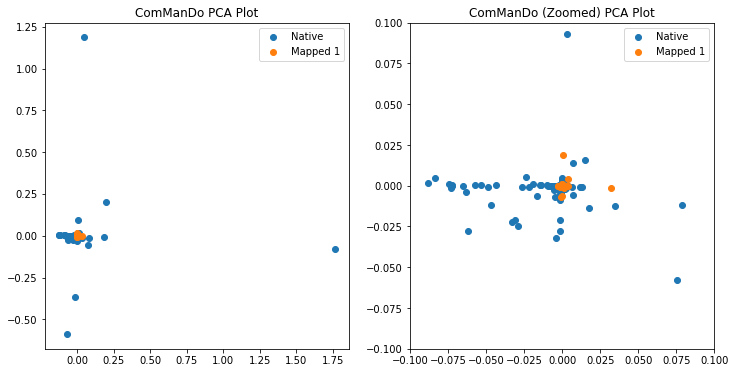

In [10]:
print('NMAcom Pairwise Error: ' + str(pairwise_error(*commando_out, normalize_by_feature=True)))

plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
alignment_visualize(*commando_out, alg_name='ComManDo')

plt.subplot(1, 2, 2)
plt.axis([-.1, .1, -.1, .1])
alignment_visualize(*commando_out, alg_name='ComManDo (Zoomed)')